In [1]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("utils.R")

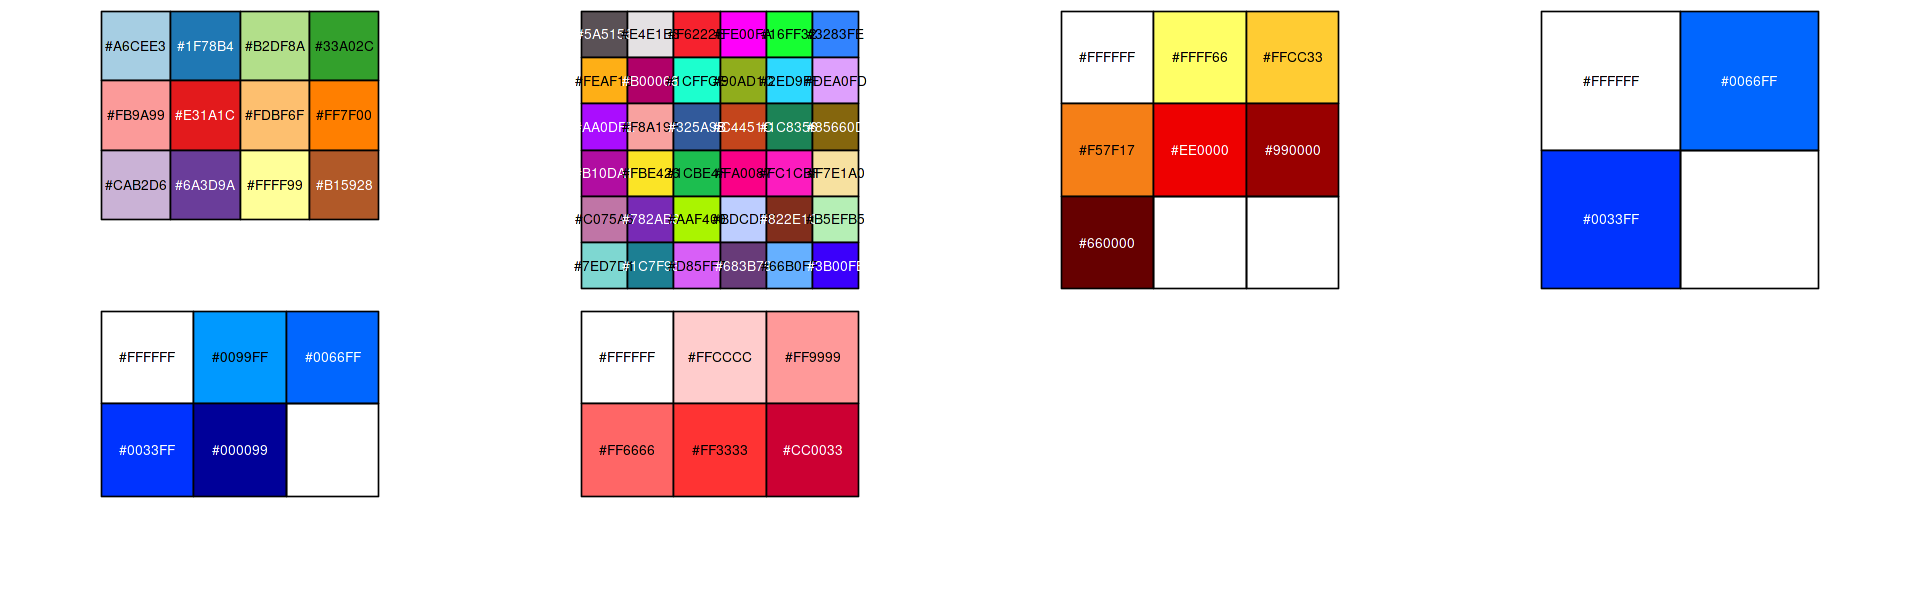

In [2]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [3]:
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line mixing experiment", "human adult atlas subset1", "human adult atlas subset2",  "Buenrostro2018", "Chen2019", "10X PBMC multiomics")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [9]:
root <- "/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/"

In [7]:
file1 <- "results_meta_data2.tsv"
file2 <- "results_all_metrics2.tsv"
df <- read.table(file1, sep='\t', header=TRUE)
df_metrics <- read.table(file2, sep='\t', header=TRUE)

# Fig 3

## Easy task

### Atlas1

In [10]:
j <- 2
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0(root, d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### Aggregation

In [11]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
11,ARI,0.9576162,aggregation,aggregation,default,0,default,15,0.05,candidate1/evaluation/aggregation/default/0/default/15/r0.05_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r0.05.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
12,ARI,0.9691559,aggregation,aggregation,default,0,default,15,0.10,candidate1/evaluation/aggregation/default/0/default/15/r0.1_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r0.1.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
13,ARI,0.9930640,aggregation,aggregation,default,0,default,15,0.35,candidate1/evaluation/aggregation/default/0/default/15/r0.35_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r0.35.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
14,ARI,0.9476121,aggregation,aggregation,default,0,default,15,0.50,candidate1/evaluation/aggregation/default/0/default/15/r0.5_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r0.5.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
15,ARI,0.9380637,aggregation,aggregation,default,0,default,15,0.60,candidate1/evaluation/aggregation/default/0/default/15/r0.6_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r0.6.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
16,ARI,0.8856731,aggregation,aggregation,default,0,default,15,1.00,candidate1/evaluation/aggregation/default/0/default/15/r1_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r1.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


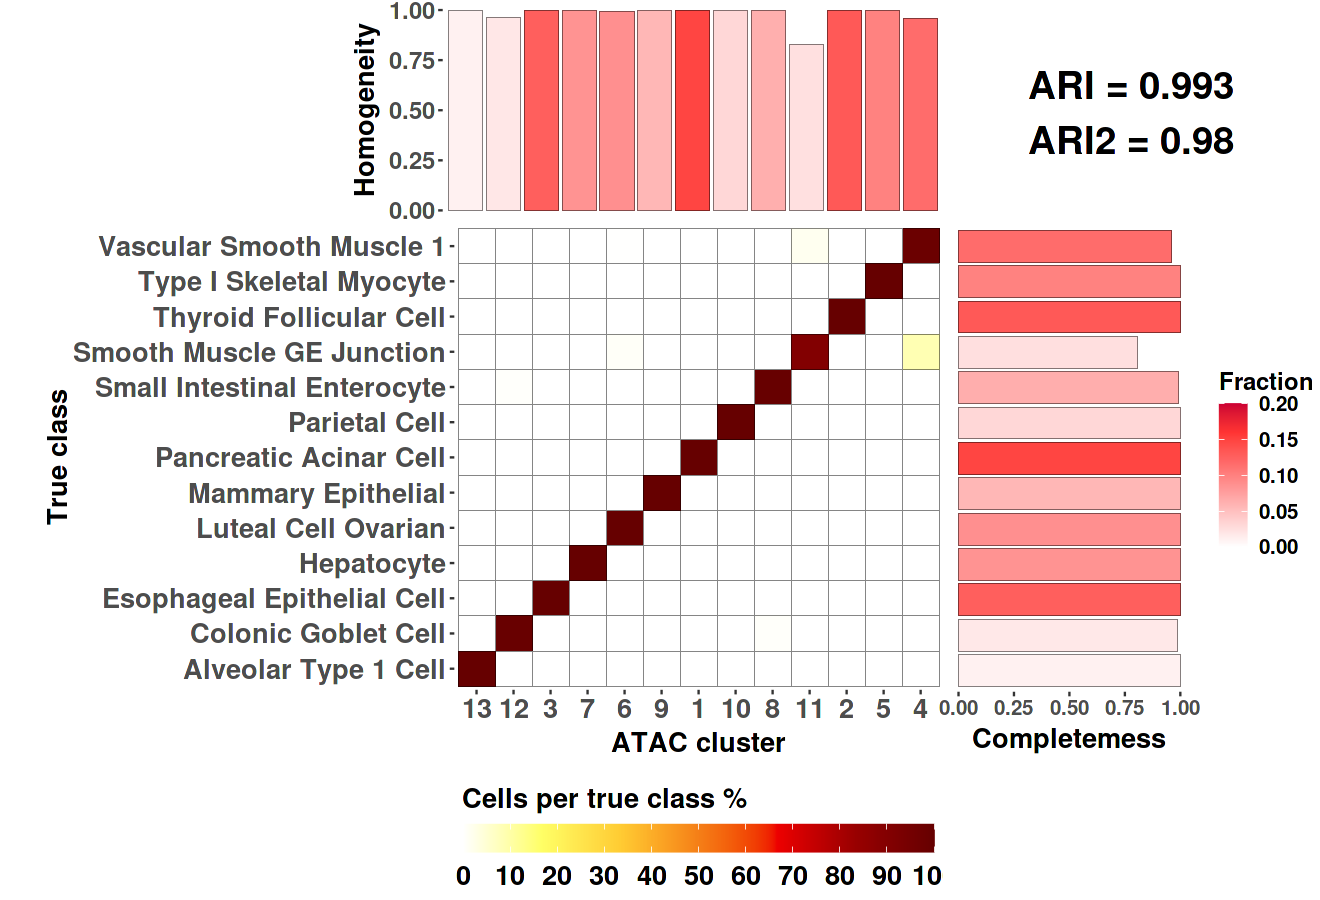

In [12]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=7.5)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]
clustering_file <- 'candidate1/clustering/aggregation/default/0/default/15/seed0/r0.35.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.5, c=3.1, m=0, n=0.2)
p2

In [13]:
pdf("agg_Atlas1_ndim15_crosstable_best.pdf", width=11, height=8)
plot(p2)
dev.off() 

png 
  2

#### ArchR

In [14]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_tiles") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
10,ARI,0.9386315,ArchR,ArchR_tiles,tiles,500,default,15,0.05,candidate1/evaluation/ArchR/tiles/500/default/15/r0.05_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.05.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
11,ARI,0.9510676,ArchR,ArchR_tiles,tiles,500,default,15,0.15,candidate1/evaluation/ArchR/tiles/500/default/15/r0.15_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.15.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
13,ARI,0.8143376,ArchR,ArchR_tiles,tiles,500,default,15,0.20,candidate1/evaluation/ArchR/tiles/500/default/15/r0.2_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.2.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
14,ARI,0.7696539,ArchR,ArchR_tiles,tiles,500,default,15,0.25,candidate1/evaluation/ArchR/tiles/500/default/15/r0.25_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.25.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
15,ARI,0.7299782,ArchR,ArchR_tiles,tiles,500,default,15,0.30,candidate1/evaluation/ArchR/tiles/500/default/15/r0.3_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.3.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
19,ARI,0.6848250,ArchR,ArchR_tiles,tiles,500,default,15,0.45,candidate1/evaluation/ArchR/tiles/500/default/15/r0.45_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.45.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
18,ARI,0.6990774,ArchR,ArchR_tiles,tiles,500,default,15,0.50,candidate1/evaluation/ArchR/tiles/500/default/15/r0.5_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.5.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
20,ARI,0.6610747,ArchR,ArchR_tiles,tiles,500,default,15,0.55,candidate1/evaluation/ArchR/tiles/500/default/15/r0.55_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.55.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
29,ARI,0.4878942,ArchR,ArchR_tiles,tiles,500,default,15,0.90,candidate1/evaluation/ArchR/tiles/500/default/15/r0.9_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.9.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1


In [18]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'candidate1/clustering/ArchR/tiles/500/default/15/seed0/r0.05.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

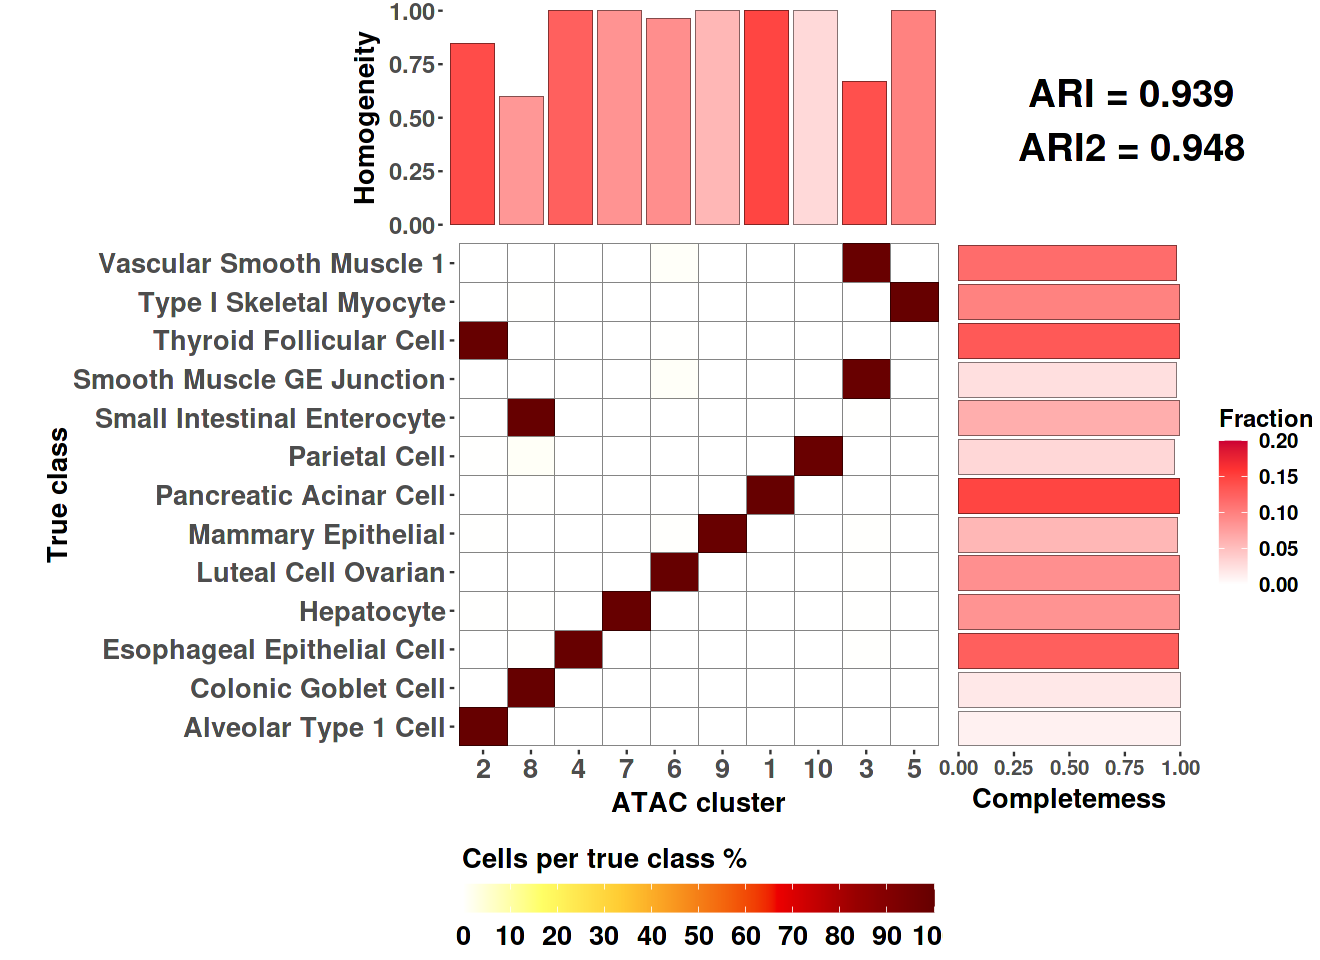

In [17]:
options(repr.plot.width=11, repr.plot.height=8)
ground_truth <- factor(gsub("_", " ", ground_truth))
p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.5, c=3.1, m=0, n=0.2)
p1

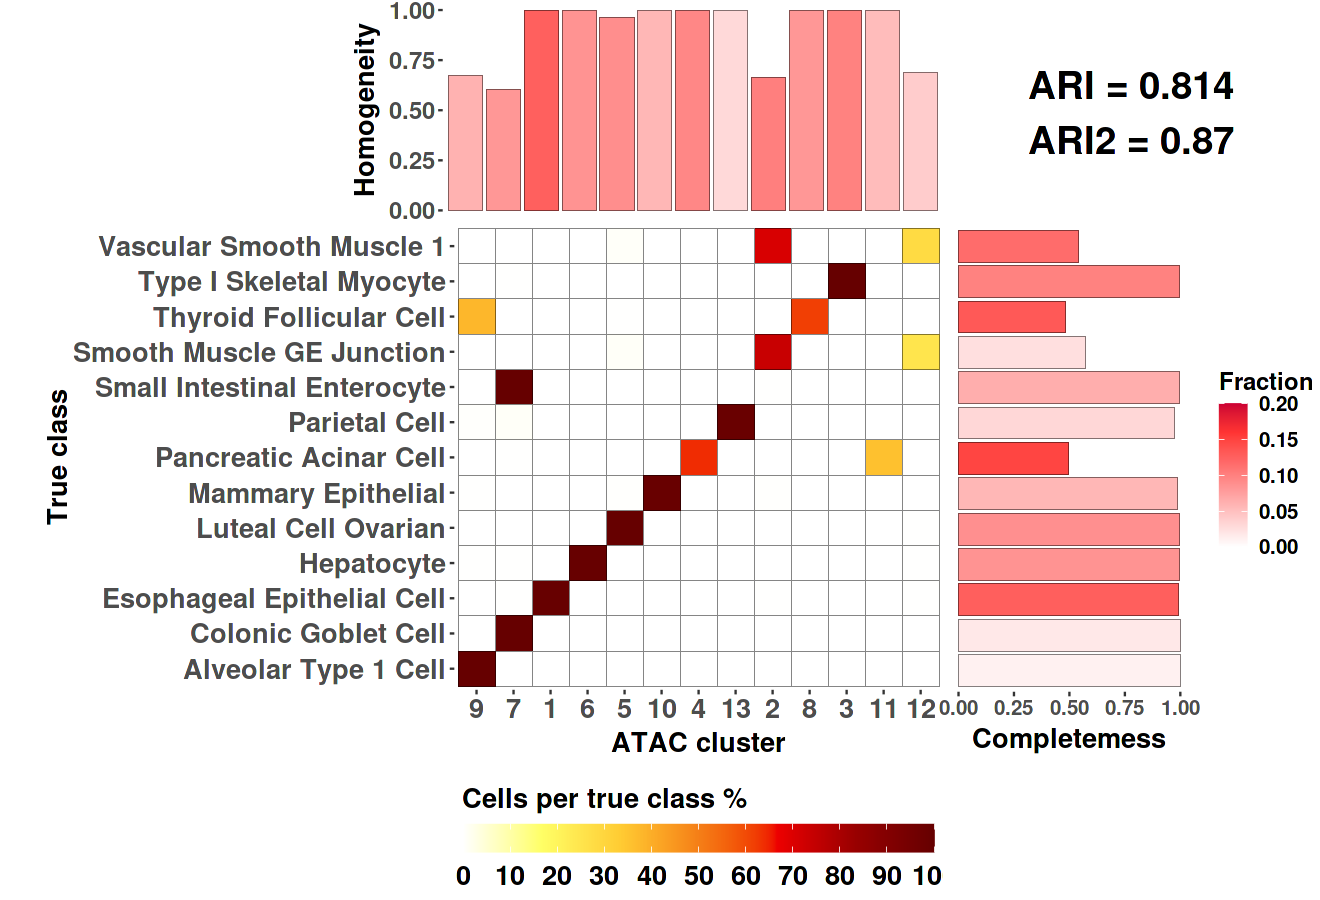

In [19]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=7.5)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]

clustering_file <- 'candidate1/clustering/ArchR/tiles/500/default/15/seed0/r0.2.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.5, c=3.1, m=0, n=0.2)
p2

In [20]:
pdf("ArchR_Atlas1_ndim15_crosstable_best.pdf", width=11, height=8)
plot(p1)
dev.off() 

pdf("ArchR_Atlas1_ndim15_crosstable_k.optimal.pdf", width=11, height=7.5)
plot(p2)
dev.off() 

png 
  2

png 
  2

#### Signac

In [21]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "Signac_by_cluster_peaks") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
10,ARI,0.9524732,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
11,ARI,0.9555852,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.20,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.2.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
12,ARI,0.9320496,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.25,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.25.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
13,ARI,0.8860260,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.30,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.3.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
16,ARI,0.8512176,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.35,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.35_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.35.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
20,ARI,0.6716671,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.55,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.55_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.55.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
28,ARI,0.5733243,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.90,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.9_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.9.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
18,ARI,0.8205317,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.40,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.4_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.4.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
21,ARI,0.6742353,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.60,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.6_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.6.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1


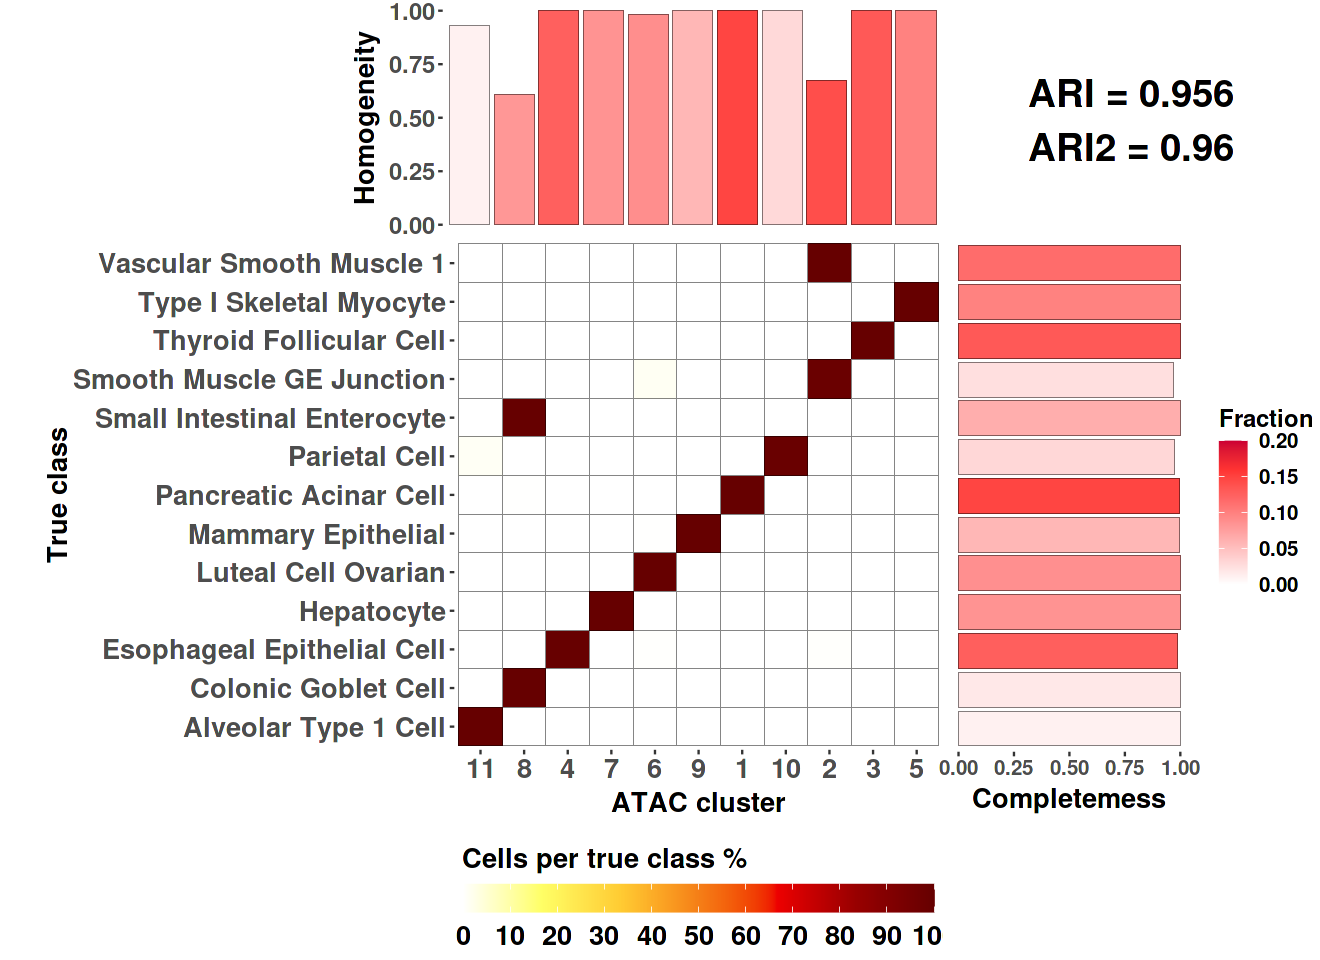

In [22]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'candidate1/clustering/Signac/by_cluster_peaks/0/default/15/seed0/r0.2.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p3 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.5, c=3.1, m=0, n=0.2)
p3

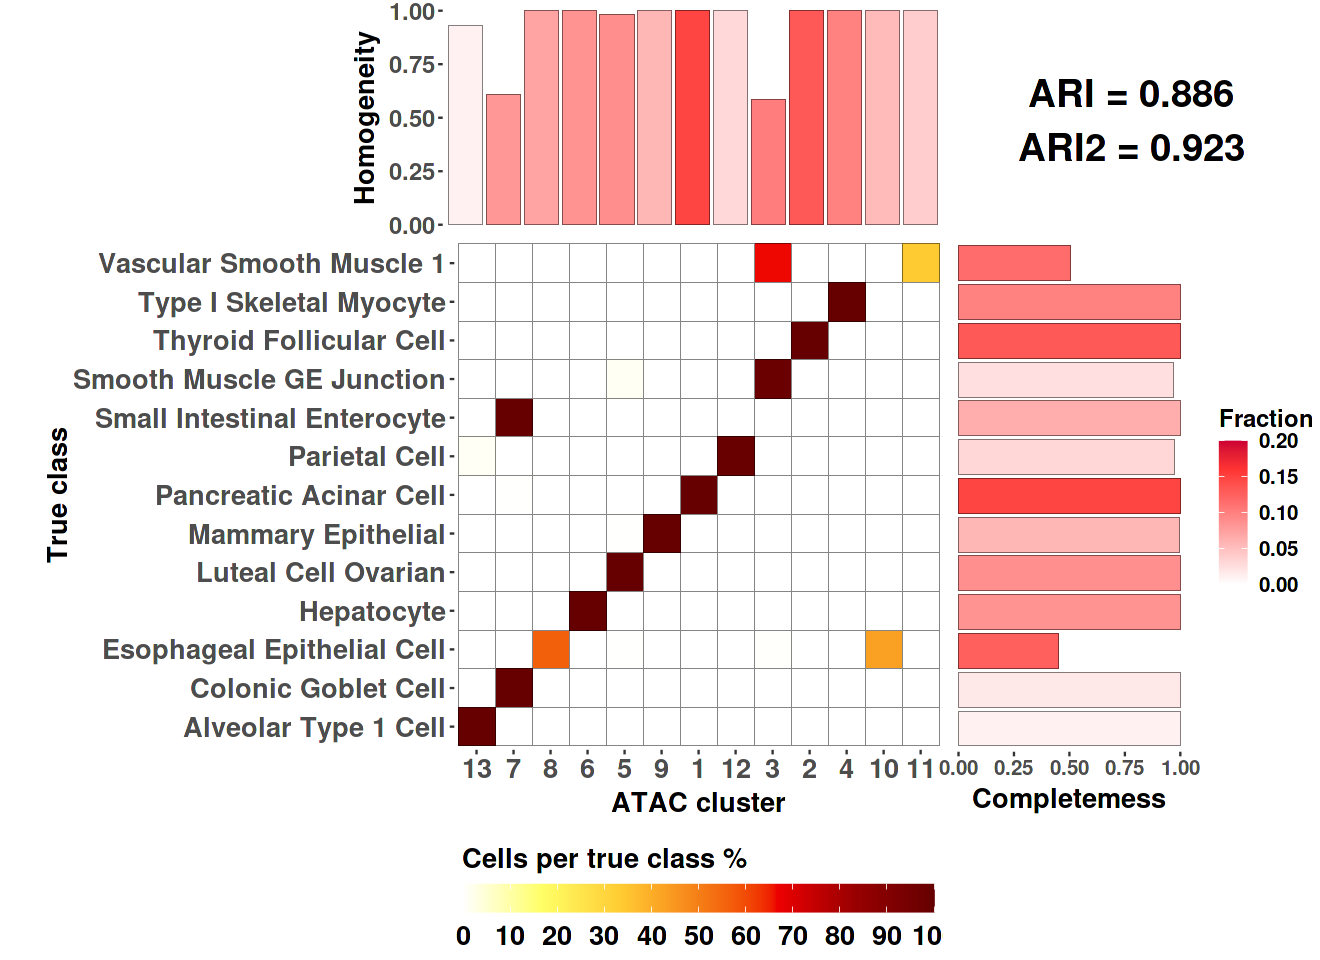

In [23]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 4
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'candidate1/clustering/Signac/by_cluster_peaks/0/default/15/seed0/r0.3.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p4 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.5, c=3.1, m=0, n=0.2)
p4

In [24]:
pdf("Signac_Atlas1_ndim15_crosstable_best.pdf", width=11, height=8)
plot(p3)
dev.off() 

pdf("Signac_Atlas1_ndim15_crosstable_k.optimal.pdf", width=11, height=8)
plot(p4)
dev.off() 

png 
  2

png 
  2

#### SnapATAC2

In [25]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_cosine") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
12,ARI,0.9687820,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.05,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.05_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.05.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
13,ARI,0.9765607,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.25,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.25_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.25.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
14,ARI,0.9448981,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.30,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.3_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.3.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
18,ARI,0.7998266,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.45,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.45_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.45.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
19,ARI,0.8266850,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.50,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.5_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.5.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
24,ARI,0.6438843,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.90,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.9_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.9.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
15,ARI,0.9150407,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.40,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.4_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.4.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
20,ARI,0.7922670,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.60,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.6_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.6.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1
23,ARI,0.6537844,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.80,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.8_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.8.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1


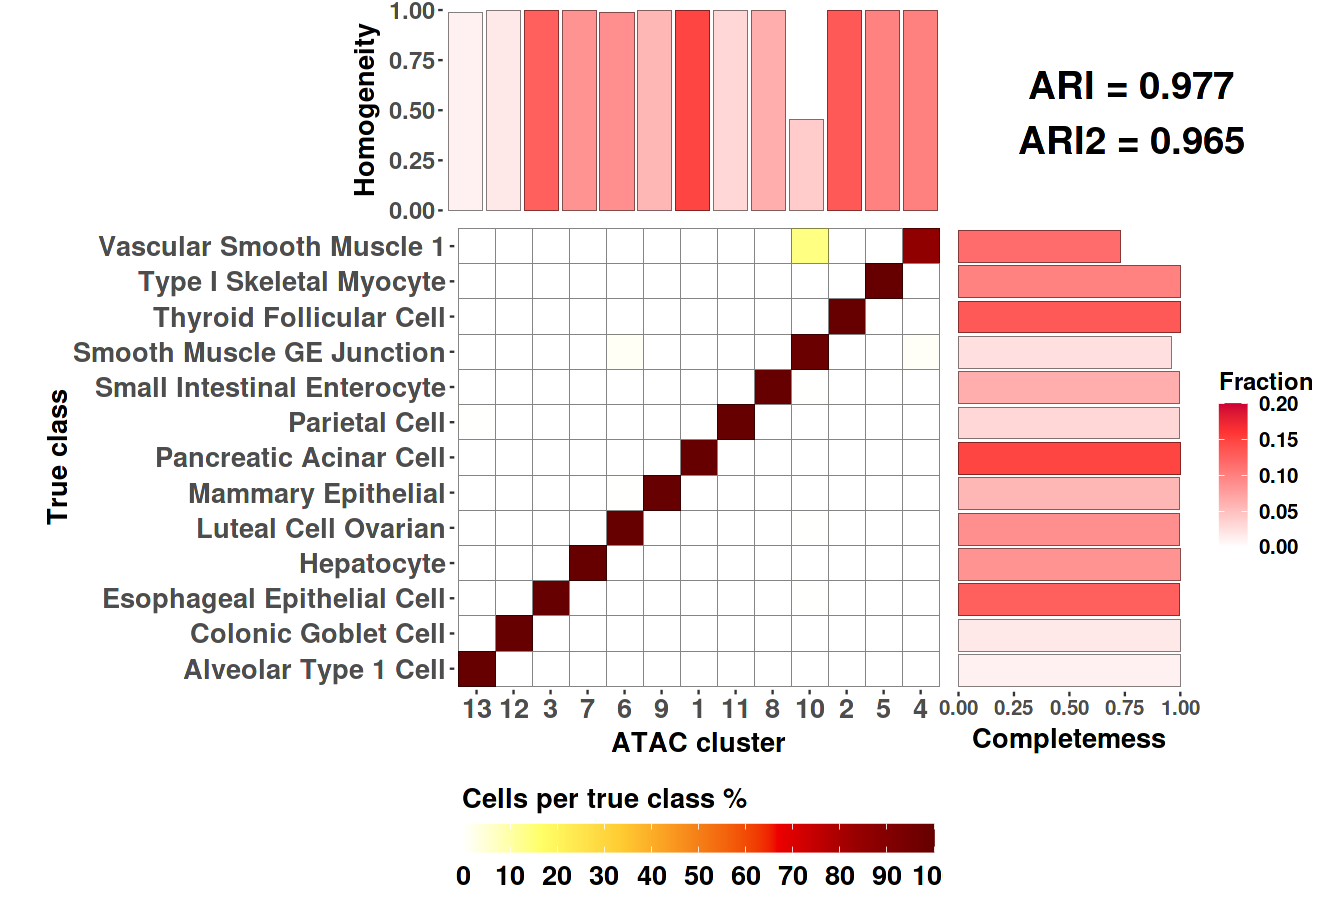

In [26]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=7.5)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'candidate1/clustering/SnapATAC2/default/500/cosine/15/seed0/r0.25.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p3 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.5, c=3.1, m=0, n=0.2)
p3

In [27]:
pdf("SnapATAC2_Atlas1_ndim15_crosstable_best.pdf", width=11, height=8)
plot(p3)
dev.off() 


png 
  2

### Atlas2

In [28]:
j <- 3
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0(root, d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### aggregation

In [29]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
9,ARI,0.9727395,aggregation,aggregation,default,0,default,15,0.075,candidate2/evaluation/aggregation/default/0/default/15/r0.075_evaluation.RDS,candidate2/clustering/aggregation/default/0/default/15/r0.075.tsv,candidate2/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
11,ARI,0.9891915,aggregation,aggregation,default,0,default,15,0.275,candidate2/evaluation/aggregation/default/0/default/15/r0.275_evaluation.RDS,candidate2/clustering/aggregation/default/0/default/15/r0.275.tsv,candidate2/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2


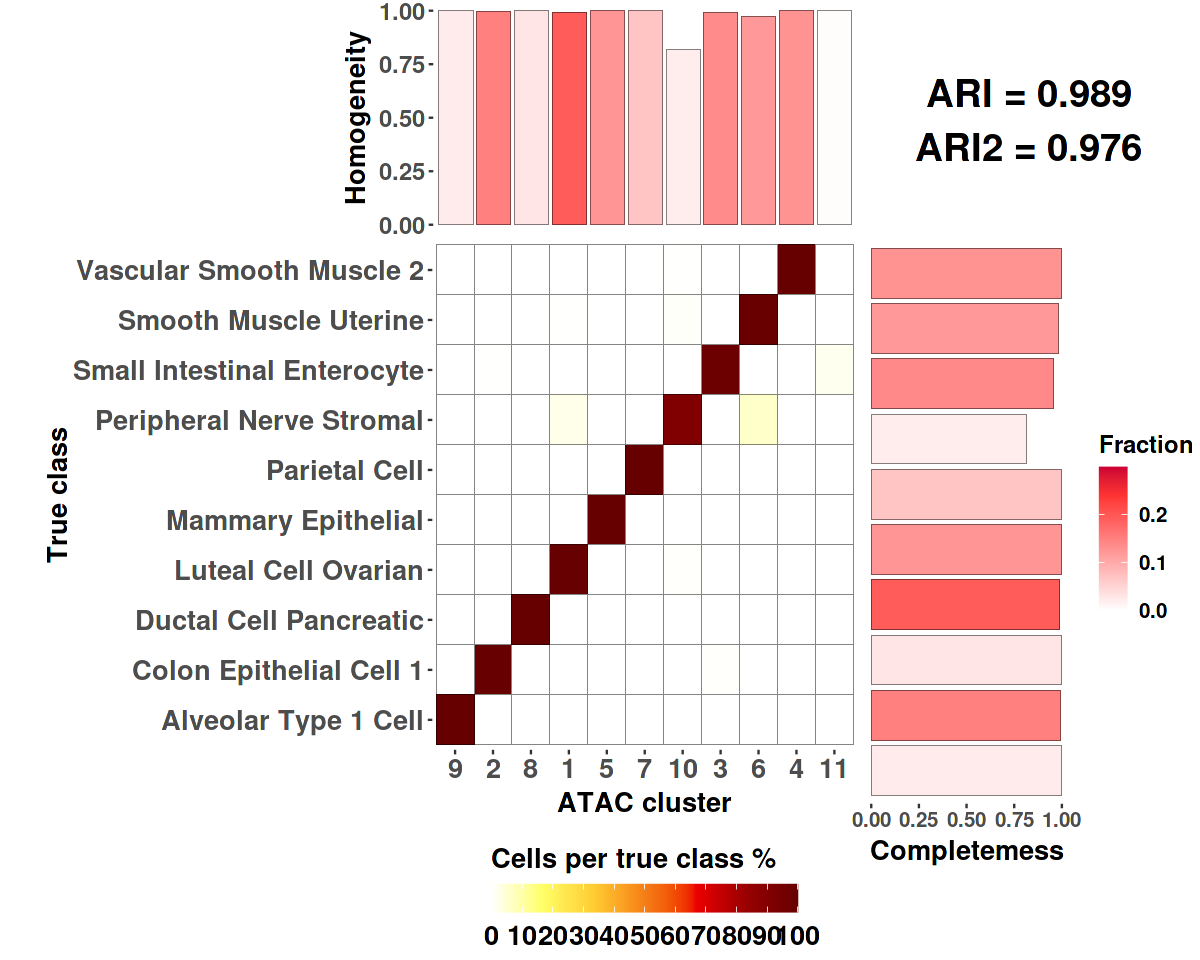

In [37]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- "candidate2/clustering/aggregation/default/0/default/15/seed0/r0.25.tsv"
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=7.3, c=2, m=0, n=0.3)
p1

In [38]:
pdf("agg_Atlas2_ndim15_crosstable_best.pdf", width=10, height=7.5)
plot(p1)
dev.off() 

png 
  2

#### SnapATAC2

In [39]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_jaccard") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
10,ARI,0.9970627,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.05,candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.05_evaluation.RDS,candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.05.tsv,candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
11,ARI,0.9702873,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.25,candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.25_evaluation.RDS,candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.25.tsv,candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
12,ARI,0.9180487,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.35,candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.35_evaluation.RDS,candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.35.tsv,candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
13,ARI,0.8226798,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.40,candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.4_evaluation.RDS,candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.4.tsv,candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2


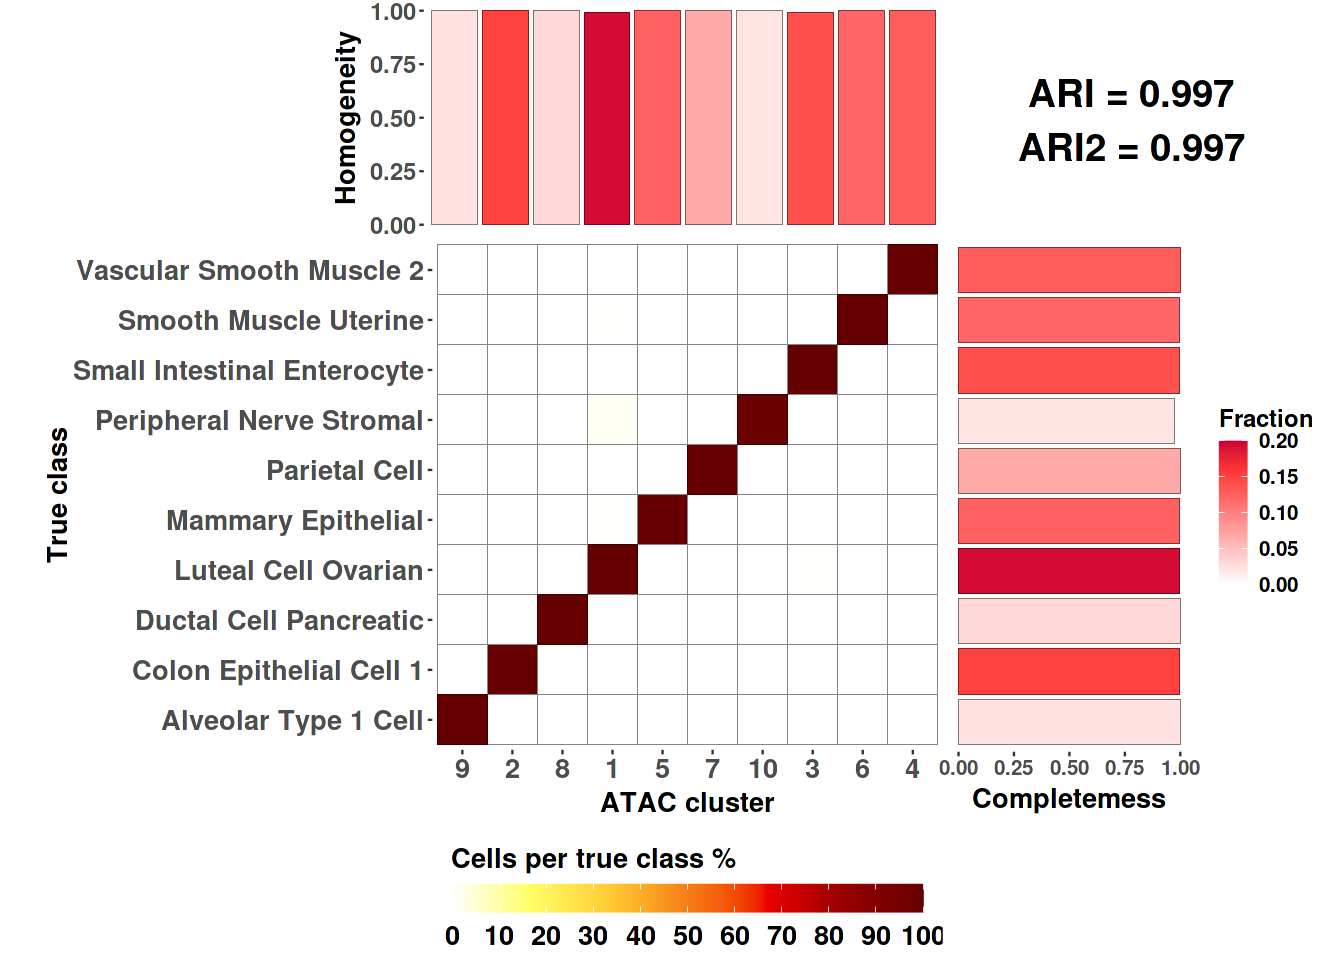

In [40]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'candidate2/clustering/SnapATAC2/default/500/jaccard/15/0/r0.05.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.1, c=3.1, m=0, n=0.2)
p1

In [41]:
pdf("SnapATAC2_jaccard_Atlas2_ndim15_crosstable_best.pdf", width=11, height=8)
plot(p1)
dev.off() 

png 
  2

#### ArchR

In [42]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_tiles") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
7,ARI,0.7088466,ArchR,ArchR_tiles,tiles,500,default,15,0.050,candidate2/evaluation/ArchR/tiles/500/default/15/r0.05_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.05.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
8,ARI,0.7972060,ArchR,ArchR_tiles,tiles,500,default,15,0.075,candidate2/evaluation/ArchR/tiles/500/default/15/r0.075_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.075.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
9,ARI,0.9376304,ArchR,ArchR_tiles,tiles,500,default,15,0.175,candidate2/evaluation/ArchR/tiles/500/default/15/r0.175_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.175.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
10,ARI,0.8626431,ArchR,ArchR_tiles,tiles,500,default,15,0.225,candidate2/evaluation/ArchR/tiles/500/default/15/r0.225_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.225.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
12,ARI,0.7667946,ArchR,ArchR_tiles,tiles,500,default,15,0.275,candidate2/evaluation/ArchR/tiles/500/default/15/r0.275_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.275.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
11,ARI,0.7623701,ArchR,ArchR_tiles,tiles,500,default,15,0.300,candidate2/evaluation/ArchR/tiles/500/default/15/r0.3_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.3.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
14,ARI,0.6999160,ArchR,ArchR_tiles,tiles,500,default,15,0.325,candidate2/evaluation/ArchR/tiles/500/default/15/r0.325_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.325.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2
13,ARI,0.7282432,ArchR,ArchR_tiles,tiles,500,default,15,0.350,candidate2/evaluation/ArchR/tiles/500/default/15/r0.35_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.35.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,human adult atlas subset2,10,candidate2


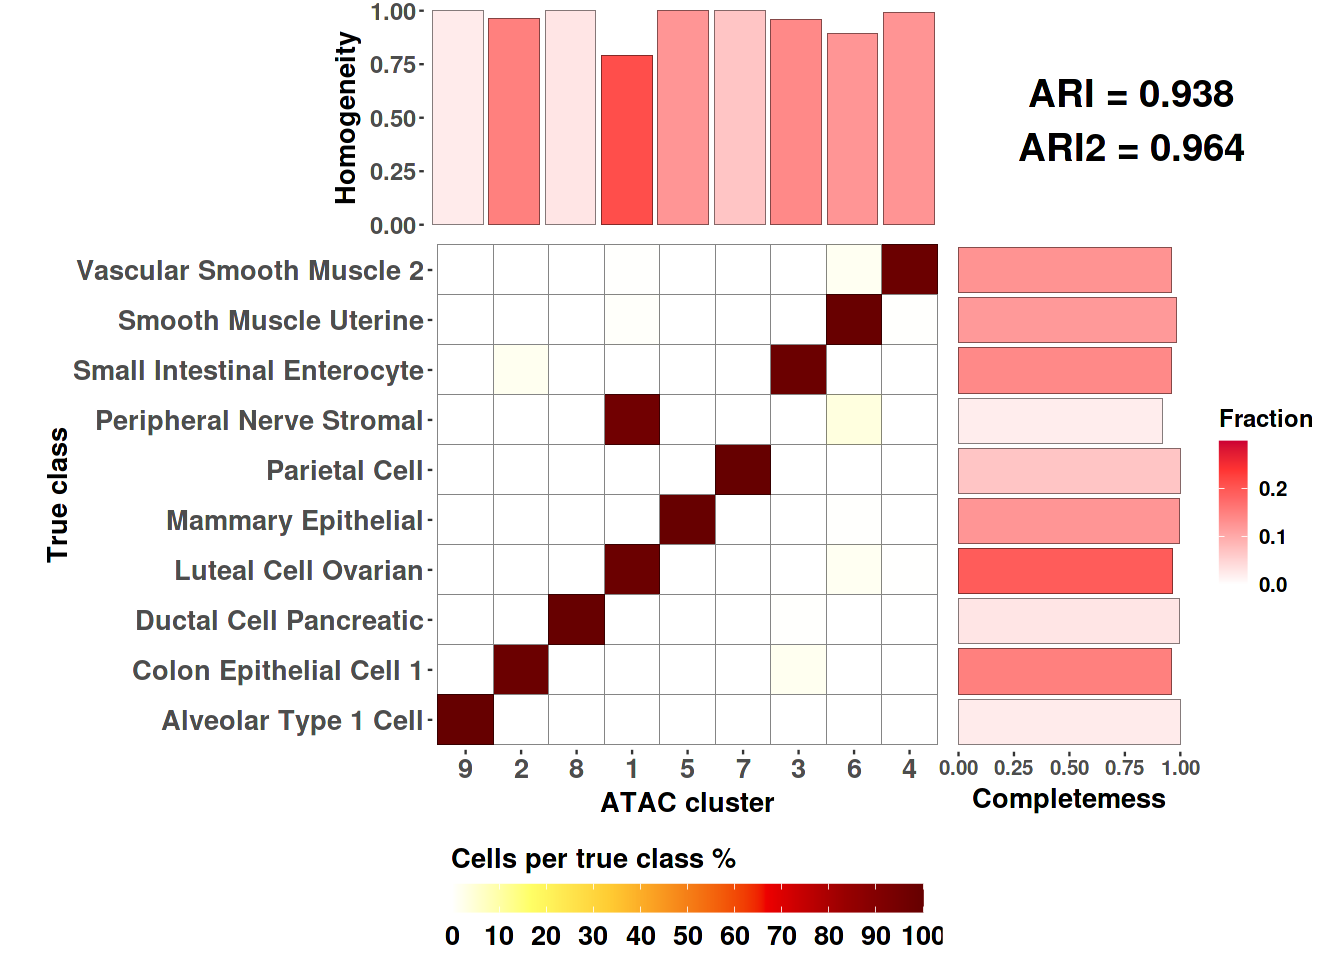

In [43]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- "candidate2/clustering/ArchR/tiles/500/default/15/0/r0.175.tsv"
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.1, c=3.1, m=0, n=0.3)
p1

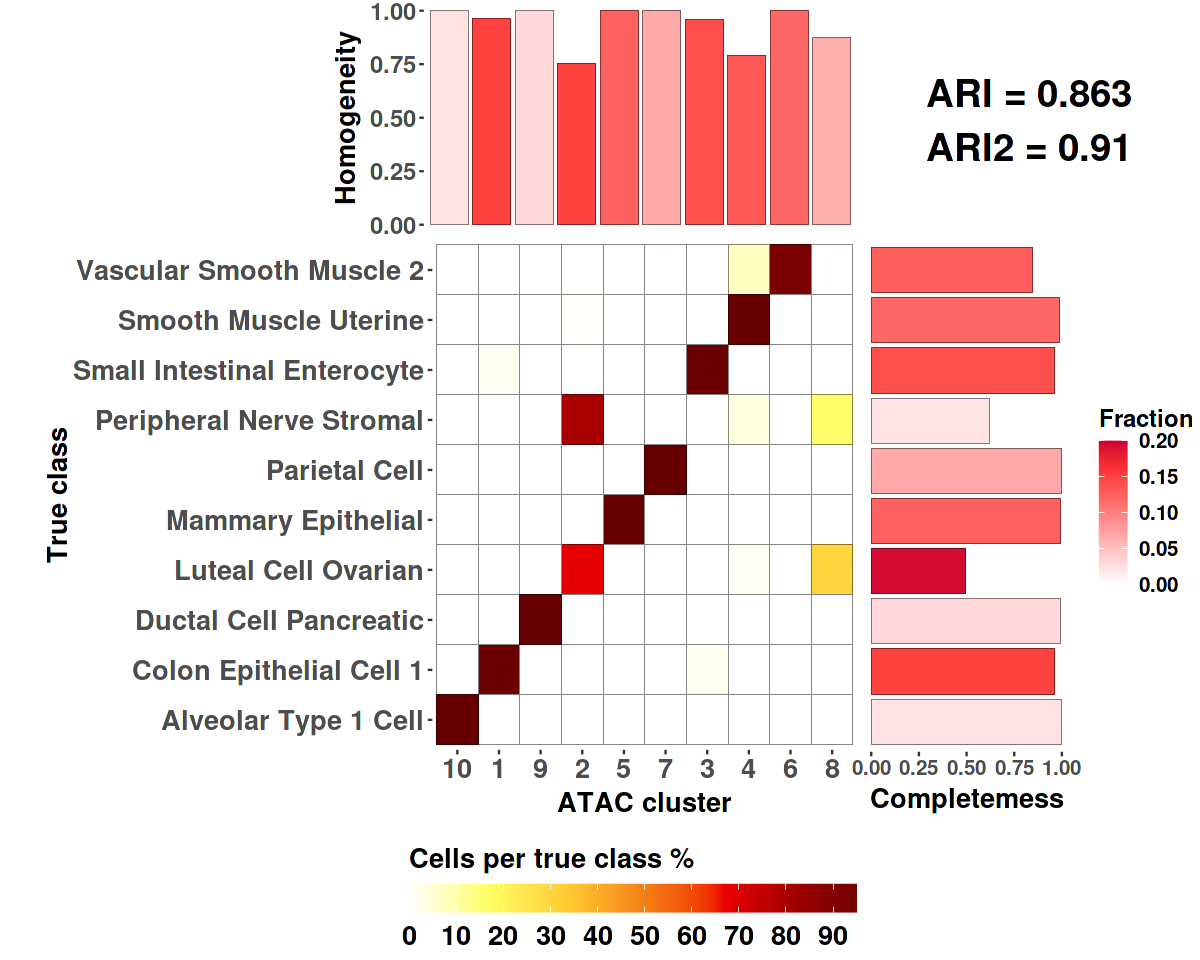

In [44]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 4
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- "candidate2/clustering/ArchR/tiles/500/default/15/0/r0.225.tsv"
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=7.1, c=3.1, m=0, n=0.2)
p2

In [45]:
pdf("ArchR_Atlas2_ndim15_crosstable_best.pdf", width=11, height=8)
plot(p1)
dev.off() 

pdf("ArchR_Atlas2_ndim15_crosstable_k.optimal.pdf", width=11, height=7.5)
plot(p2)
dev.off() 

png 
  2

png 
  2

### Cell line

In [46]:
j <- 1
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0(root, d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC1

In [47]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC1") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
10,ARI,0.9899449,SnapATAC1,SnapATAC1,default,5000,default,15,0.15,Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.15_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.15.tsv,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
11,ARI,0.9244996,SnapATAC1,SnapATAC1,default,5000,default,15,0.25,Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.25_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.25.tsv,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
12,ARI,0.8843780,SnapATAC1,SnapATAC1,default,5000,default,15,0.40,Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.4_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.4.tsv,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing


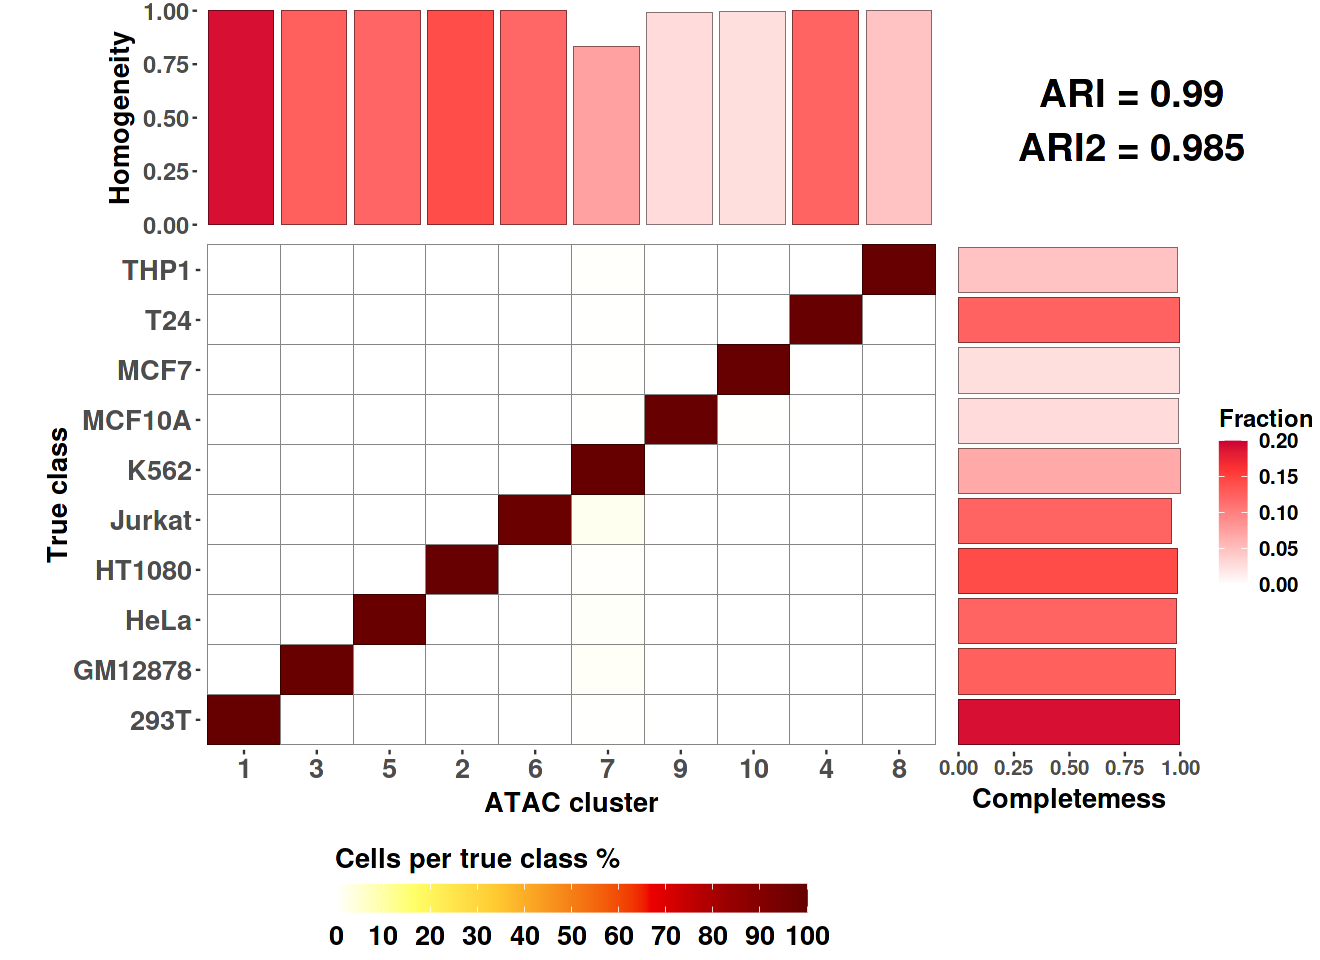

In [48]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/seed0/r0.15.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=2.3, c=3.1, m=0, n=0.2)
p1

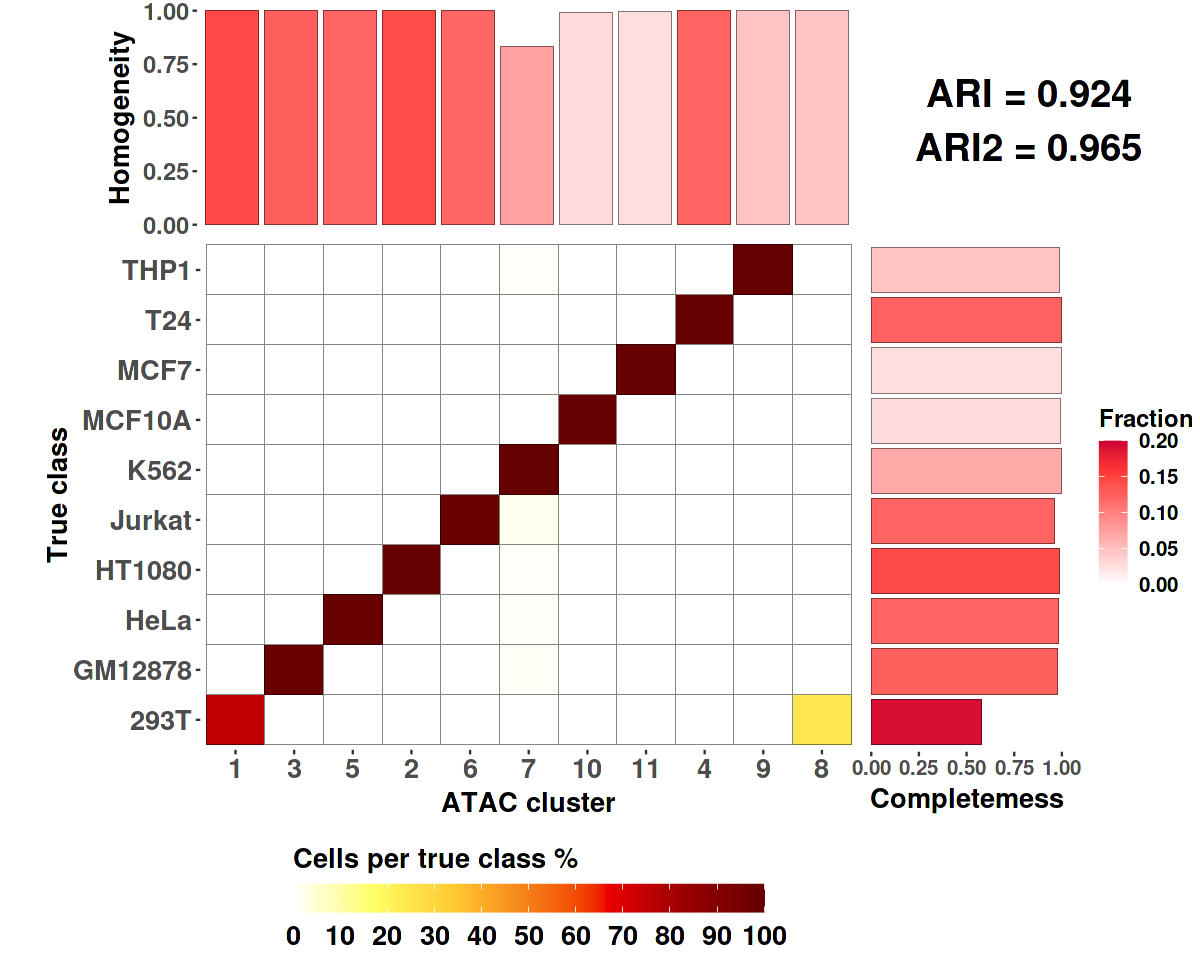

In [49]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/seed0/r0.25.tsv'
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=2.3, c=3.1, m=0, n=0.2)
p2

In [50]:
pdf("SnapATAC1_cellline_ndim15_crosstable_best.pdf", width=9, height=8)
plot(p1)
dev.off() 

pdf("SnapATAC1_cellline_ndim15_crosstable_k.optimal.pdf", width=9, height=8)
plot(p2)
dev.off() 

png 
  2

png 
  2

#### SnapATAC2

In [51]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_jaccard") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
10,ARI,0.9944054,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.10,Cell_line_mixing/evaluation/SnapATAC2/default/500/jaccard/15/r0.1_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/r0.1.tsv,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
11,ARI,0.9566631,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.25,Cell_line_mixing/evaluation/SnapATAC2/default/500/jaccard/15/r0.25_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/r0.25.tsv,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing


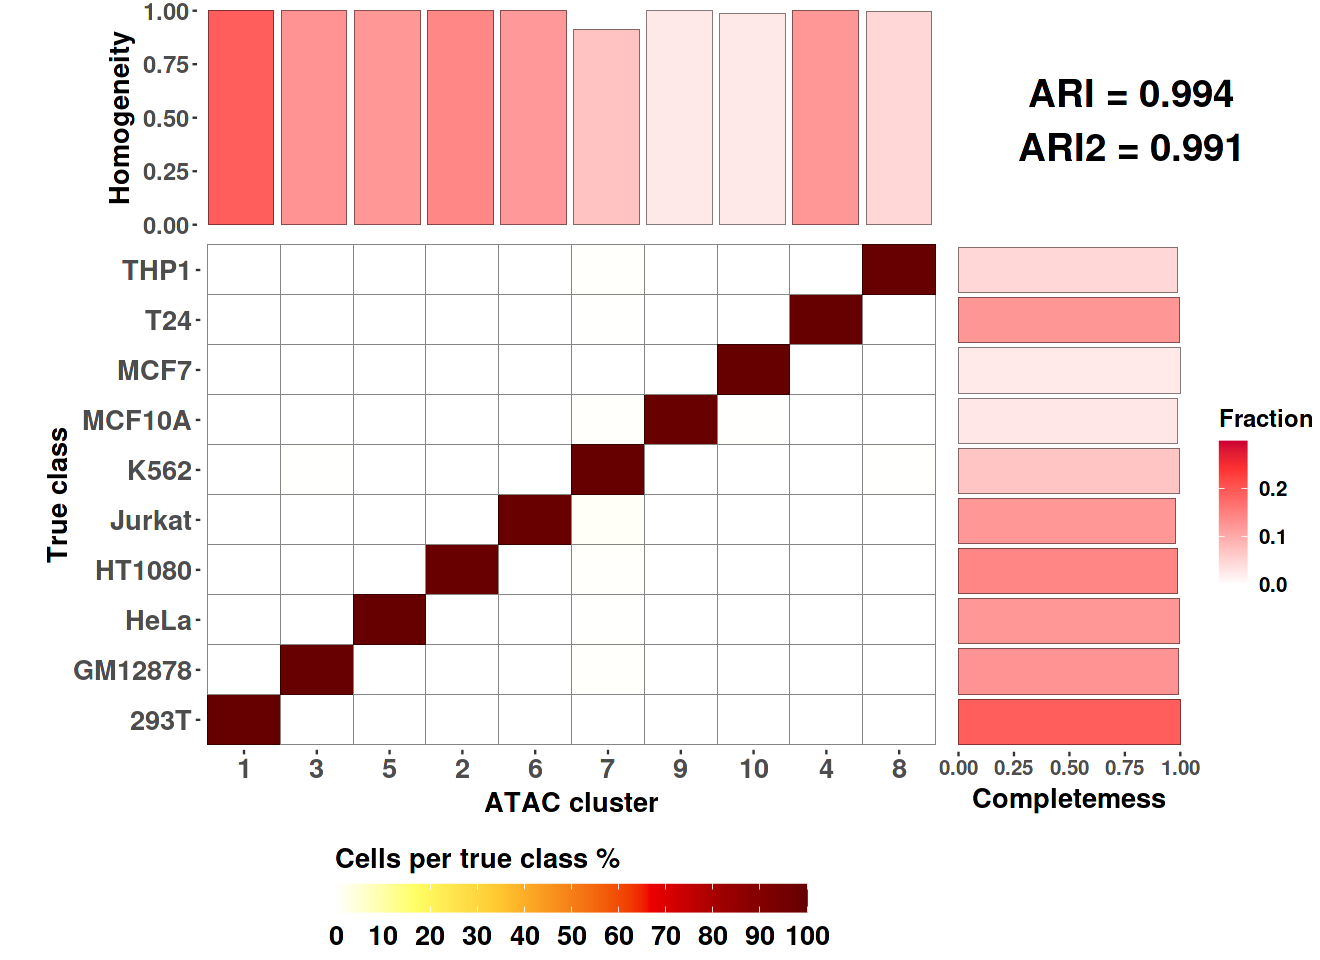

In [52]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- "Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/seed0/r0.1.tsv"
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=2.3, c=3.1, m=0, n=0.3)
p1

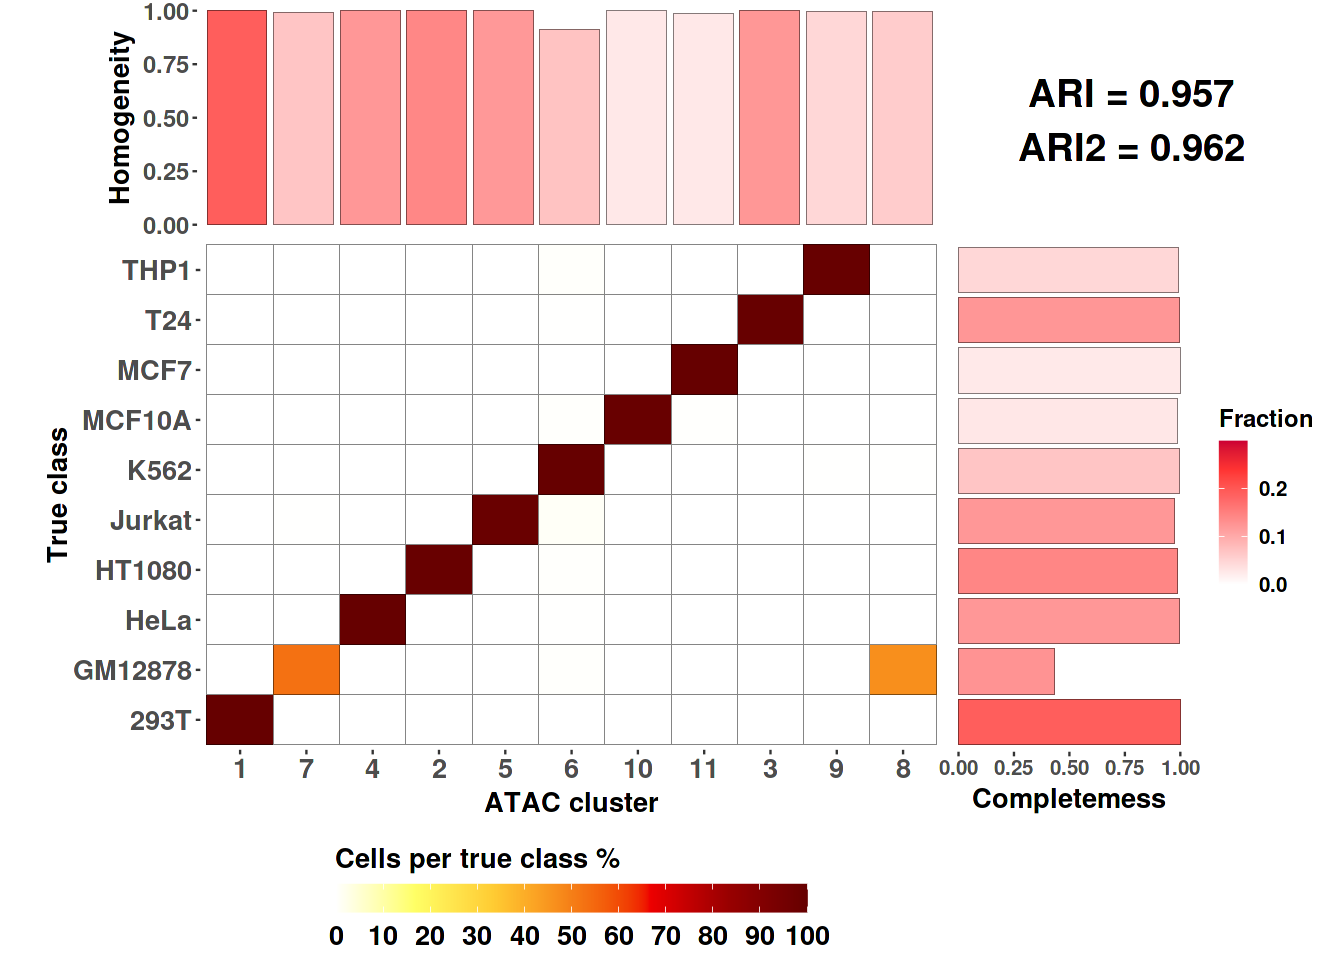

In [53]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=11, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- "Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/seed0/r0.25.tsv"
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=2.3, c=3.1, m=0, n=0.3)
p2

In [54]:
pdf("SnapATAC2_jaccard_cellline_ndim15_crosstable_best.pdf", width=9, height=8)
plot(p1)
dev.off() 
pdf("SnapATAC2_jaccard_cellline_ndim15_crosstable.pdf", width=9, height=8)
plot(p2)
dev.off() 

png 
  2

png 
  2

## Difficult task

### Chen_2019

In [57]:
j <- 5
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0(root, d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC1

In [58]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC1") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
5,ARI,0.5400488,SnapATAC1,SnapATAC1,default,5000,default,15,0.175,Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.175_evaluation.RDS,Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.175.tsv,Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
6,ARI,0.6875588,SnapATAC1,SnapATAC1,default,5000,default,15,0.200,Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.2_evaluation.RDS,Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.2.tsv,Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
7,ARI,0.6930372,SnapATAC1,SnapATAC1,default,5000,default,15,0.250,Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.25_evaluation.RDS,Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.25.tsv,Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
8,ARI,0.7461826,SnapATAC1,SnapATAC1,default,5000,default,15,0.450,Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.45_evaluation.RDS,Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.45.tsv,Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
9,ARI,0.6517272,SnapATAC1,SnapATAC1,default,5000,default,15,0.650,Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.65_evaluation.RDS,Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.65.tsv,Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019


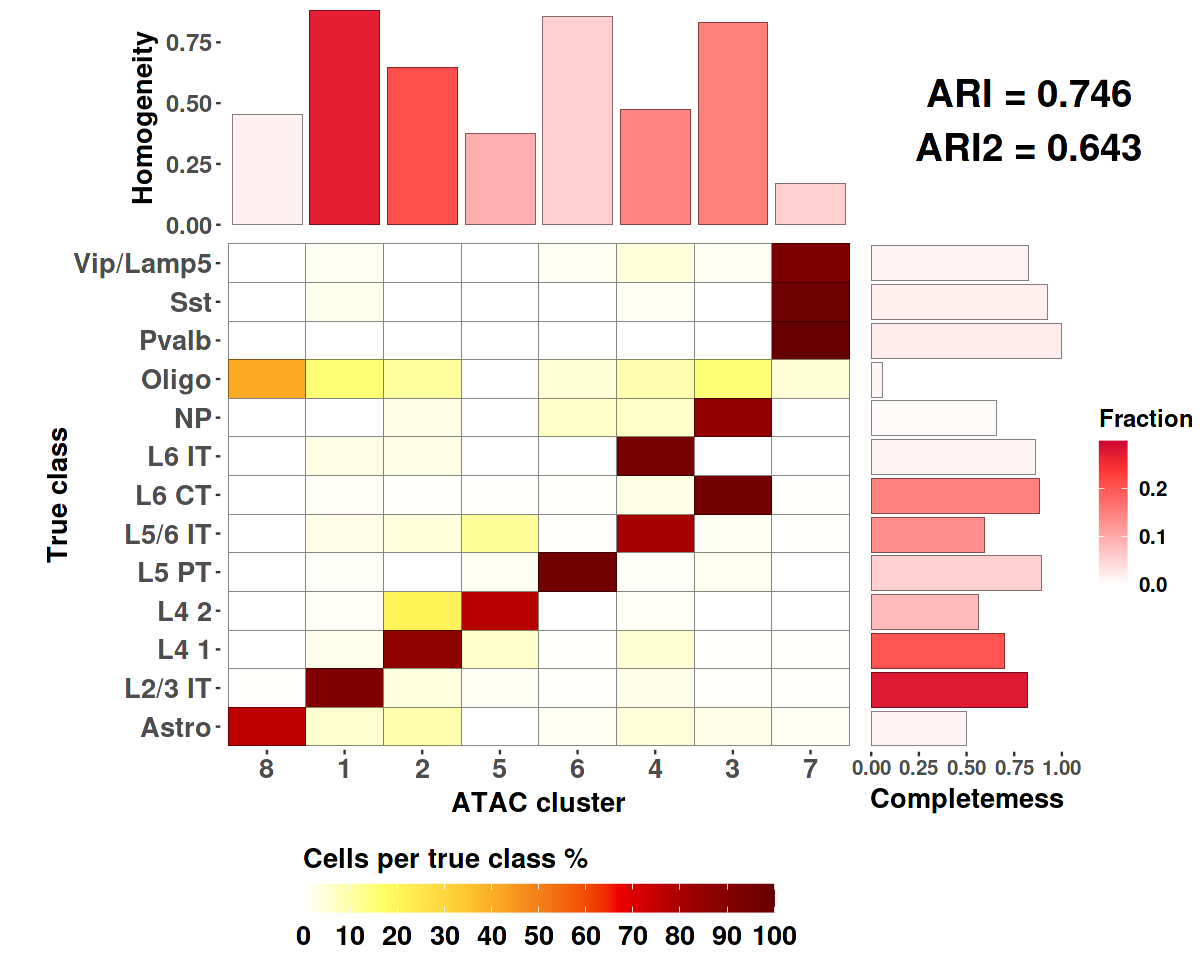

In [59]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 4
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- "Chen_2019/clustering/SnapATAC1/default/5000/default/15/seed0/r0.45.tsv"
sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=2.8, c=3.1, m=0, n=0.3)
p1

In [60]:
pdf("SnapATAC1_Chen2019_ndim15_crosstable.pdf", width=10, height=8)
plot(p1)
dev.off() 

png 
  2

#### Aggregation

In [63]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
7,ARI,0.5646719,aggregation,aggregation,default,500,default,15,0.075,Chen_2019/evaluation/aggregation/default/500/default/15/r0.075_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.075.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
9,ARI,0.6916607,aggregation,aggregation,default,500,default,15,0.100,Chen_2019/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.1.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
10,ARI,0.7169810,aggregation,aggregation,default,500,default,15,0.125,Chen_2019/evaluation/aggregation/default/500/default/15/r0.125_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.125.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
11,ARI,0.6725396,aggregation,aggregation,default,500,default,15,0.250,Chen_2019/evaluation/aggregation/default/500/default/15/r0.25_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.25.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
12,ARI,0.6089329,aggregation,aggregation,default,500,default,15,0.350,Chen_2019/evaluation/aggregation/default/500/default/15/r0.35_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.35.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
15,ARI,0.5704210,aggregation,aggregation,default,500,default,15,0.400,Chen_2019/evaluation/aggregation/default/500/default/15/r0.4_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.4.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
16,ARI,0.5662501,aggregation,aggregation,default,500,default,15,0.450,Chen_2019/evaluation/aggregation/default/500/default/15/r0.45_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.45.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
18,ARI,0.4559030,aggregation,aggregation,default,500,default,15,0.550,Chen_2019/evaluation/aggregation/default/500/default/15/r0.55_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.55.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019
20,ARI,0.4536188,aggregation,aggregation,default,500,default,15,0.600,Chen_2019/evaluation/aggregation/default/500/default/15/r0.6_evaluation.RDS,Chen_2019/clustering/aggregation/default/500/default/15/r0.6.tsv,Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,Chen2019,13,Chen_2019


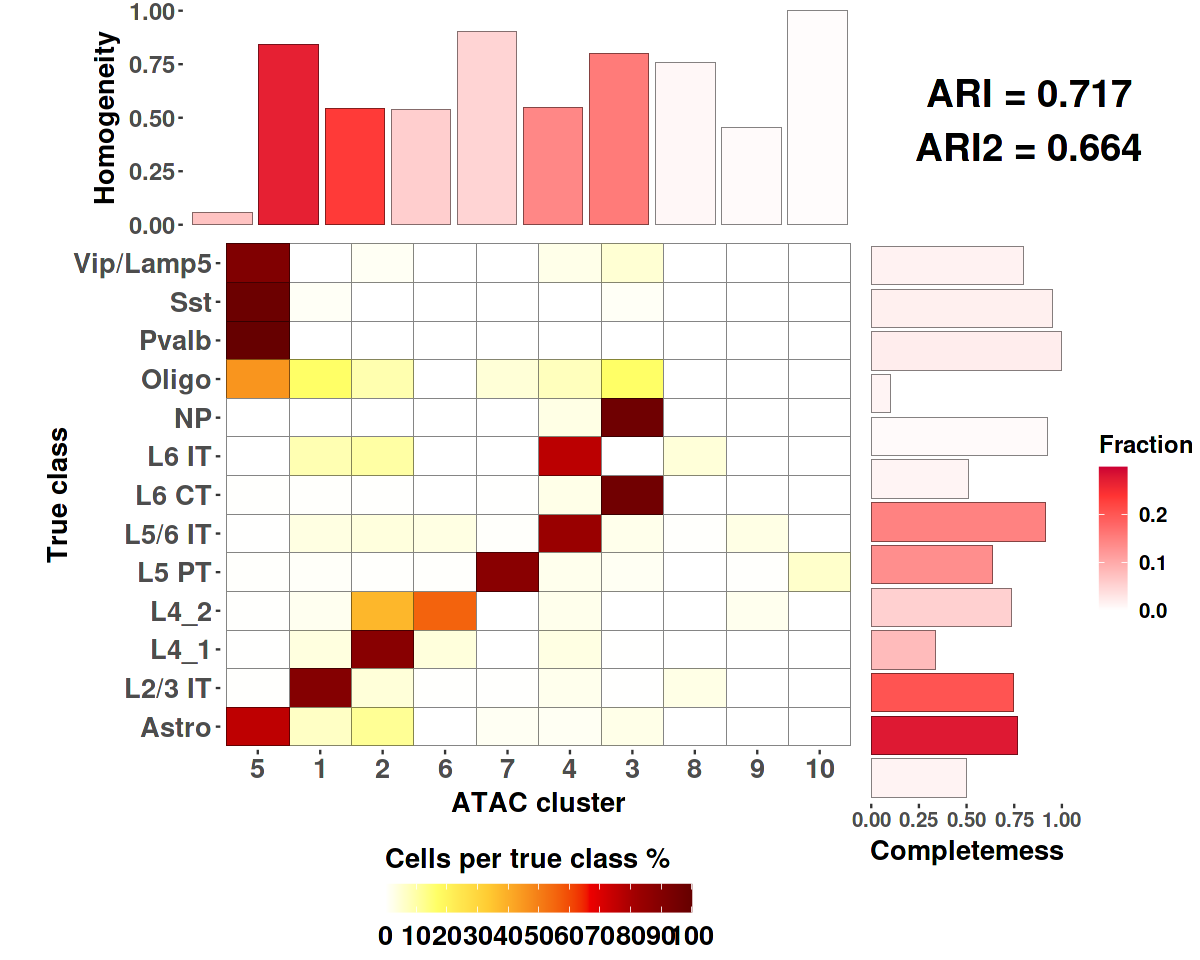

In [65]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'Chen_2019/clustering/aggregation/default/500/default/15/seed0/r0.125.tsv'

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2, c=2, m=0, n=0.3)
p1

In [66]:
pdf("agg_Chen2019_ndim15_crosstable.pdf", width=10, height=8)
plot(p1)
dev.off() 

png 
  2

### PBMC

In [67]:
j <- 6
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0(root, d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC2

In [68]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_cosine") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
6,ARI,0.6424648,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.05,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.05_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.05.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
8,ARI,0.7187719,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.10,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.1_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.1.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
11,ARI,0.8514935,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.15,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.15_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.15.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
12,ARI,0.7716238,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.25,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.25_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.25.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
13,ARI,0.7056204,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.30,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.3_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.3.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
15,ARI,0.6127192,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.35,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.35_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.35.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
16,ARI,0.5625610,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.45,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.45_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.45.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
17,ARI,0.5166864,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.55,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.55_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.55.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
18,ARI,0.5137564,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.65,PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.65_evaluation.RDS,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.65.tsv,PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics


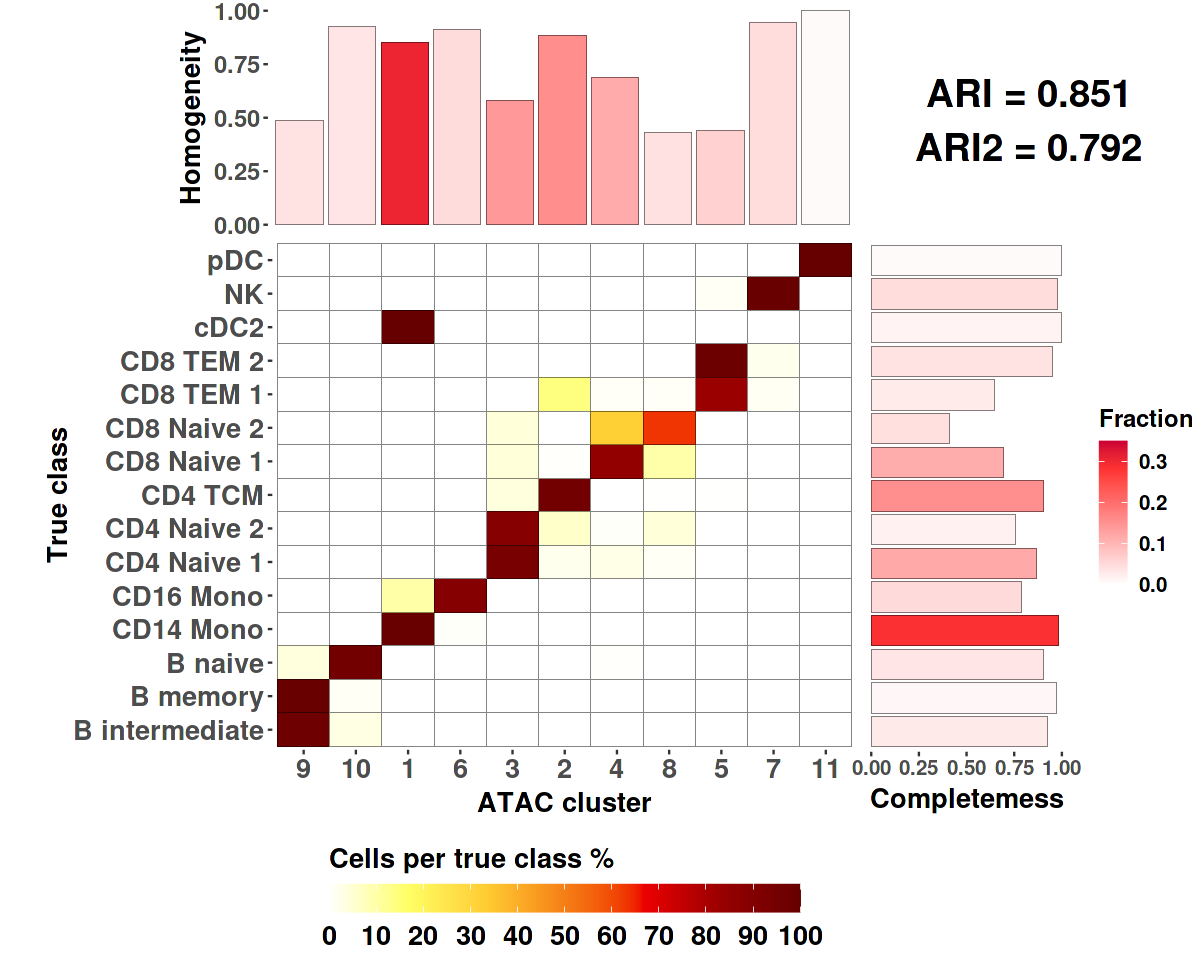

In [69]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/seed0/r0.15.tsv'

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=2, b=3.8, c=3.1, m=0, n=0.35)
p1

In [70]:
pdf("SnapATAC2_cosine_PBMC_ndim15_crosstable.pdf", width=10, height=8)
plot(p1)
dev.off() 

png 
  2

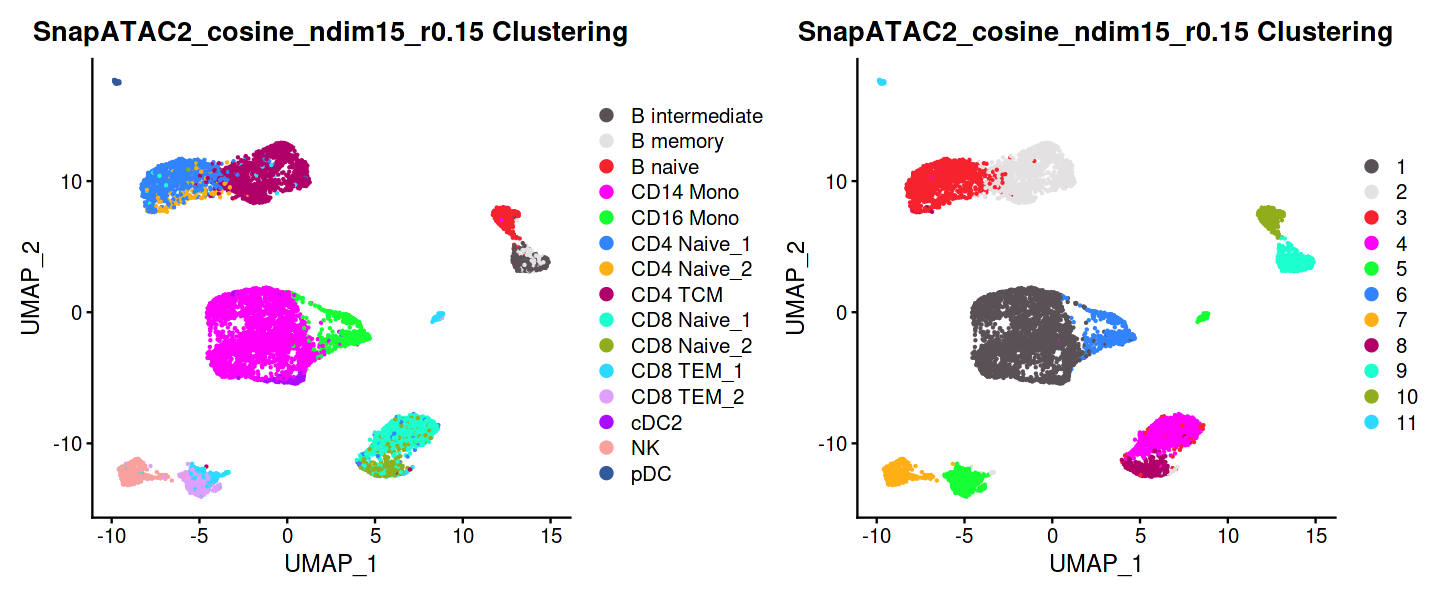

In [71]:
options(repr.plot.width=12, repr.plot.height=5)
r <- 0.15
ndim <- 15
par(mfrow=c(1,2))

p1 <- DimPlot(sobj1, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",ndim,"_r",r," Clustering")) 
#+ NoLegend()

p2 <- DimPlot(sobj2, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",ndim,"_r",r," Clustering")) #+ NoLegend()
p1 + p2

#### Aggregation

In [72]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
7,ARI,0.6544769,aggregation,aggregation,default,500,default,15,0.05,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.05_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.05.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
9,ARI,0.7243036,aggregation,aggregation,default,500,default,15,0.10,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.1.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
10,ARI,0.6786102,aggregation,aggregation,default,500,default,15,0.15,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.15_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.15.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
11,ARI,0.6873782,aggregation,aggregation,default,500,default,15,0.25,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.25_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.25.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
13,ARI,0.7798700,aggregation,aggregation,default,500,default,15,0.35,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.35_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.35.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
14,ARI,0.6357575,aggregation,aggregation,default,500,default,15,0.40,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.4_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.4.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
15,ARI,0.5668242,aggregation,aggregation,default,500,default,15,0.60,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.6_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.6.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
16,ARI,0.5115219,aggregation,aggregation,default,500,default,15,0.70,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.7_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.7.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
17,ARI,0.5038365,aggregation,aggregation,default,500,default,15,0.80,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.8_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.8.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics


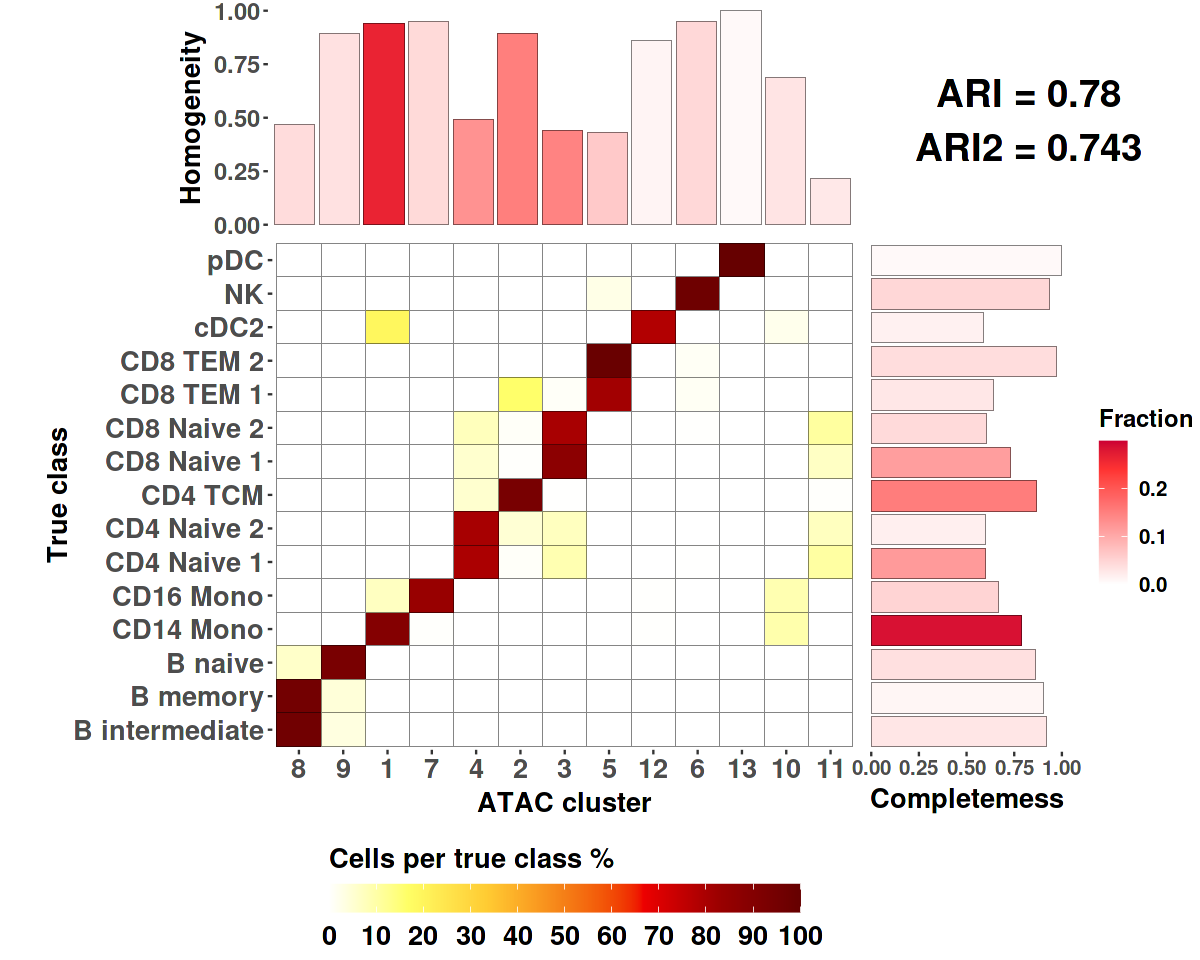

In [73]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 5
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'PBMC_multiomics/clustering/aggregation/default/500/default/15/seed0/r0.35.tsv'

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
ground_truth <- factor(gsub("_", " ", ground_truth))
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=3.8, c=3.1, m=0, n=0.3)
p2

In [74]:
pdf("agg_PBMC_ndim15_crosstable.pdf", width=10, height=8)
plot(p2)
dev.off() 

png 
  2

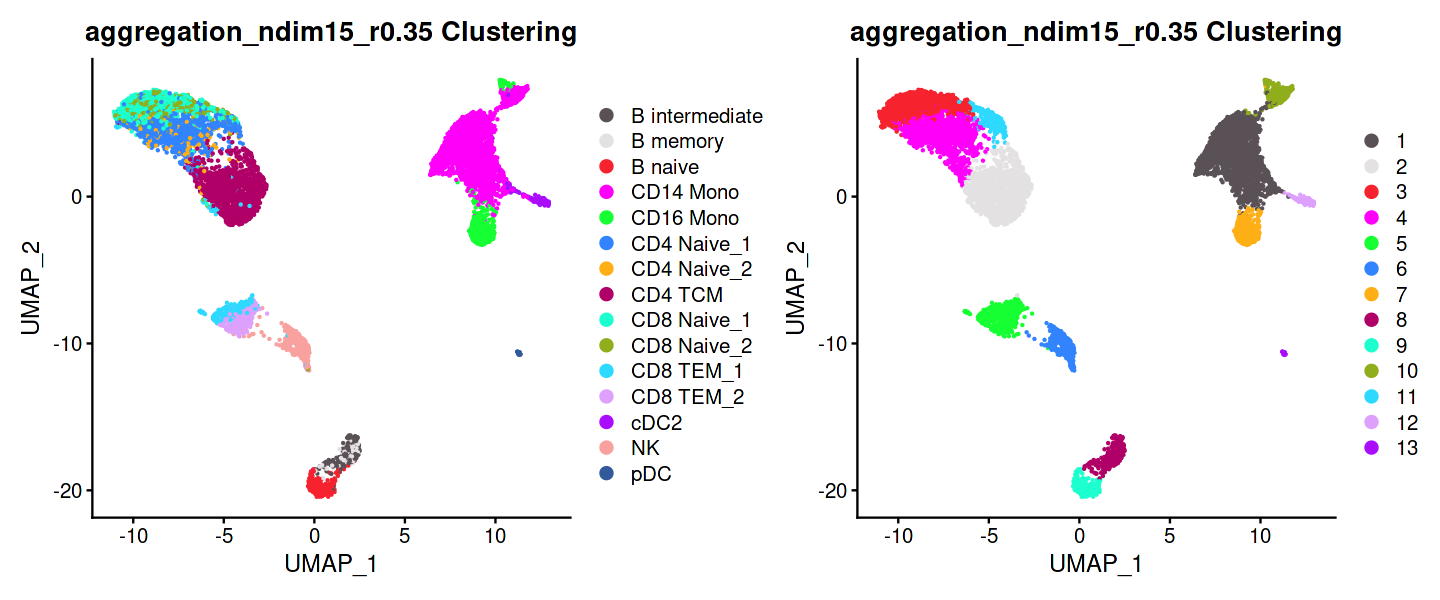

In [75]:
options(repr.plot.width=12, repr.plot.height=5)
r <- 0.35
ndim <- 15
par(mfrow=c(1,2))

p1 <- DimPlot(sobj1, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",ndim,"_r",r," Clustering")) 
#+ NoLegend()

p2 <- DimPlot(sobj2, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",ndim,"_r",r," Clustering")) #+ NoLegend()
p1 + p2

#### ArchR

In [77]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_peaks") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
5,ARI,0.6259209,ArchR,ArchR_peaks,peaks,500,default,15,0.05,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.05_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.05.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
6,ARI,0.6340222,ArchR,ArchR_peaks,peaks,500,default,15,0.10,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.1_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.1.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
11,ARI,0.7665906,ArchR,ArchR_peaks,peaks,500,default,15,0.15,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.15_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.15.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
12,ARI,0.7222654,ArchR,ArchR_peaks,peaks,500,default,15,0.20,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.2_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.2.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
14,ARI,0.7110583,ArchR,ArchR_peaks,peaks,500,default,15,0.25,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.25_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.25.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
15,ARI,0.5796537,ArchR,ArchR_peaks,peaks,500,default,15,0.40,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.4_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.4.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
16,ARI,0.5360024,ArchR,ArchR_peaks,peaks,500,default,15,0.55,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.55_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.55.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
18,ARI,0.5599262,ArchR,ArchR_peaks,peaks,500,default,15,0.60,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.6_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.6.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
17,ARI,0.5284123,ArchR,ArchR_peaks,peaks,500,default,15,0.65,PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.65_evaluation.RDS,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.65.tsv,PBMC_multiomics/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics


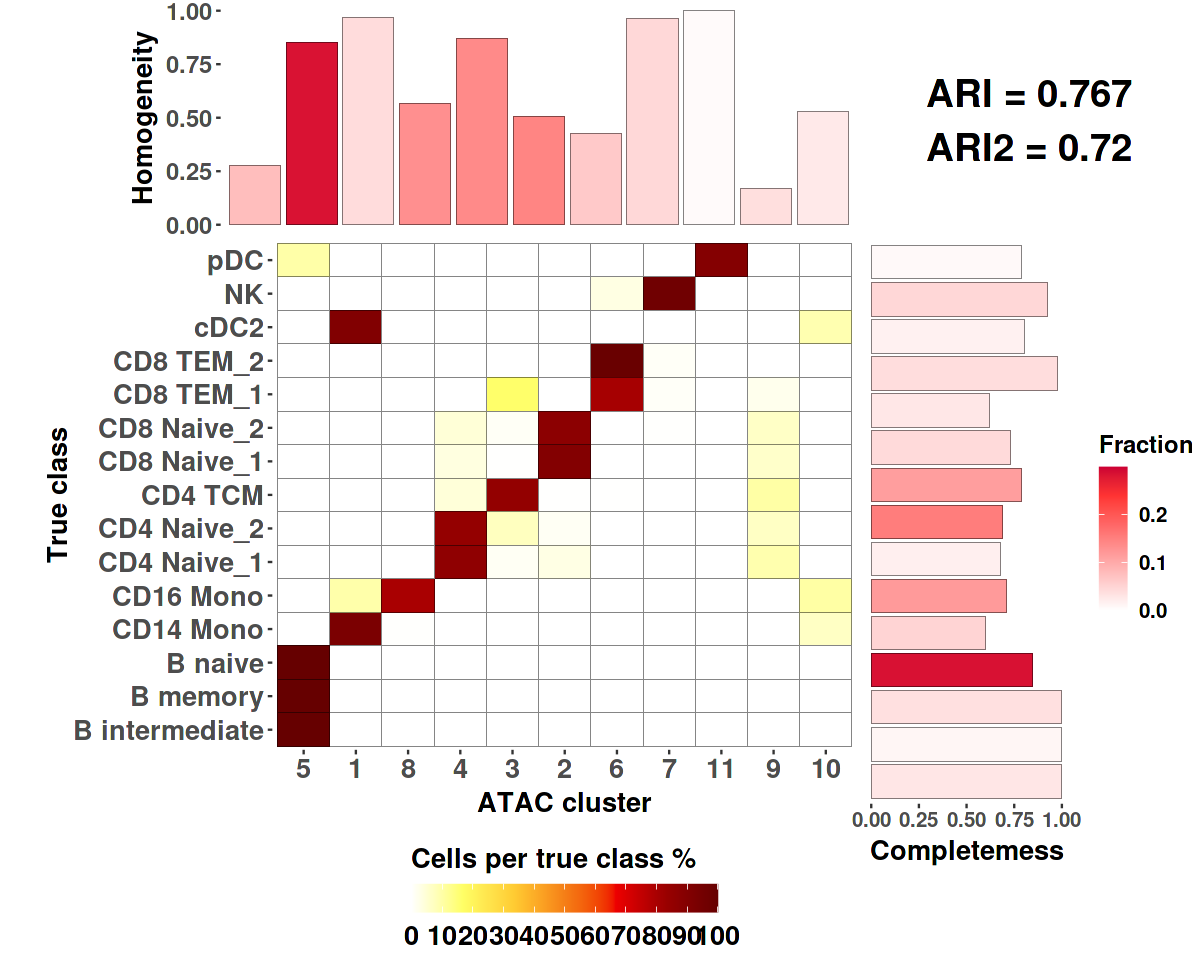

In [79]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- 'PBMC_multiomics/clustering/ArchR/peaks/500/default/15/seed0/r0.15.tsv'

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2.8, c=2, m=0, n=0.3)
p1

In [80]:
pdf("ArchR_PBMC_ndim15_crosstable.pdf", width=10, height=8)
plot(p1)
dev.off() 

png 
  2